In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
# Load and then gray scale image

image = cv2.imread('images/someshapes.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#cv2.imshow('Identifying Shapes',image)
#cv2.waitKey(0)

ret, thresh = cv2.threshold(gray, 127, 255, 1)
# Extract Contours
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
for cnt in contours:
    
    # Get approximate polygons
    approx = cv2.approxPolyDP(cnt, 0.01*cv2.arcLength(cnt,True),True)
    
    if len(approx) == 3:
        shape_name = "Triangle"
        cv2.drawContours(image,[cnt],0,(0,255,0),-1)
        
        # Find contour center to place text at the center
        M = cv2.moments(cnt)
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        cv2.putText(image, shape_name, (cx-50, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)
    
    elif len(approx) == 4:
        x,y,w,h = cv2.boundingRect(cnt)
        M = cv2.moments(cnt)
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        
        # Check to see if 4-side polygon is square or rectangle
        # cv2.boundingRect returns the top left and then width and 
        if abs(w-h) <= 3:
            shape_name = "Square"
            
            # Find contour center to place text at the center
            cv2.drawContours(image, [cnt], 0, (0, 125 ,255), -1)
            cv2.putText(image, shape_name, (cx-50, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)
        else:
            shape_name = "Rectangle"
            
            # Find contour center to place text at the center
            cv2.drawContours(image, [cnt], 0, (0, 0, 255), -1)
            M = cv2.moments(cnt)
            cx = int(M['m10'] / M['m00'])
            cy = int(M['m01'] / M['m00'])
            cv2.putText(image, shape_name, (cx-50, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)
            
    elif len(approx) == 10:
        shape_name = "Star"
        cv2.drawContours(image, [cnt], 0, (255, 255, 0), -1)
        M = cv2.moments(cnt)
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        cv2.putText(image, shape_name, (cx-50, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)
        
        
        
    elif len(approx) >= 15:
        shape_name = "Circle"
        cv2.drawContours(image, [cnt], 0, (0, 255, 255), -1)
        M = cv2.moments(cnt)
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        cv2.putText(image, shape_name, (cx-50, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)
    #cv2.imshow('Identifying Shapes',image)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()

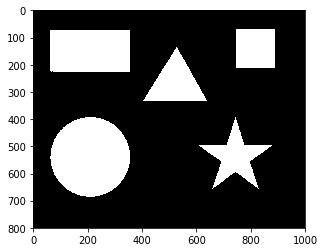

In [14]:
plt.imshow(thresh,cmap='gray')

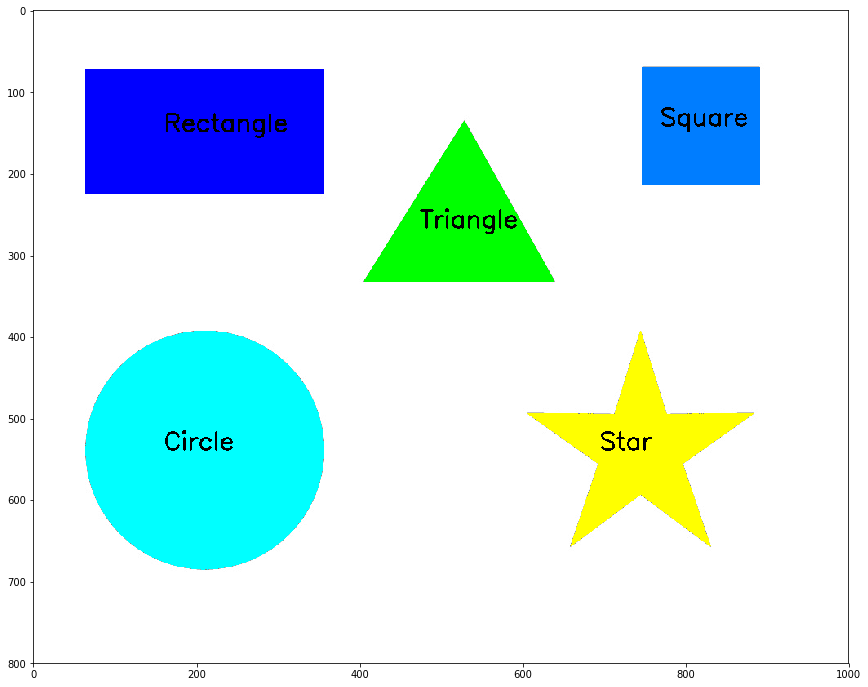

In [15]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
ax.imshow(image)